In [838]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [839]:
# read in the data
cota_df = pd.read_csv('./cancer-datasets_filtered_pancan_clinical.csv')
cota_df.head()

,bcr_patient_uuid,bcr_patient_barcode,acronym,gender,vital_status,days_to_birth,days_to_death,days_to_last_followup,days_to_initial_pathologic_diagnosis,age_at_initial_pathologic_diagnosis,...,total_bilirubin_upper_limit,platelet_result_count,fibrosis_ishak_score,fetoprotein_outcome_value,fetoprotein_outcome_upper_limit,fetoprotein_outcome_lower_limit,inter_norm_ratio_lower_limit,family_cancer_type_txt,bilirubin_upper_limit,days_to_last_known_alive
0,C2F1B2D5-1302-4E29-8889-37BA34E91DE2,TCGA-IQ-A6SG,HNSC,FEMALE,Alive,-22529.0,[Not Applicable],579.0,0.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,573E3713-781F-447E-9F4D-A7FAAE4A4F03,TCGA-IQ-A6SH,HNSC,MALE,Alive,-20109.0,[Not Applicable],471.0,0.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59DD907E-C674-46C2-BCE7-63517D5AE7A7,TCGA-XP-A8T7,ESCA,FEMALE,Alive,-23375.0,[Not Applicable],1254.0,0.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F4CB24E9-E7FD-4245-9C9B-7E0934038446,TCGA-XP-A8T6,ESCA,MALE,Dead,-19886.0,763.0,NaN,0.0,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9fa752b7-9873-4bad-9eba-8cc113705fed,TCGA-CD-5804,STAD,MALE,Alive,-32872.0,[Not Applicable],368.0,0.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [840]:
# Look at the dataypes of the columns:
cota_df.dtypes

bcr_patient_uuid                    object
bcr_patient_barcode                 object
acronym                             object
gender                              object
vital_status                        object
                                    ...   
fetoprotein_outcome_lower_limit    float64
inter_norm_ratio_lower_limit       float64
family_cancer_type_txt              object
bilirubin_upper_limit              float64
days_to_last_known_alive           float64
Length: 746, dtype: object

In [841]:
cota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10761 entries, 0 to 10760
Columns: 746 entries, bcr_patient_uuid to days_to_last_known_alive
dtypes: float64(246), object(500)
memory usage: 61.2+ MB


In [842]:
## Check for missing data and NaN
cota_df.isnull().head()

,bcr_patient_uuid,bcr_patient_barcode,acronym,gender,vital_status,days_to_birth,days_to_death,days_to_last_followup,days_to_initial_pathologic_diagnosis,age_at_initial_pathologic_diagnosis,...,total_bilirubin_upper_limit,platelet_result_count,fibrosis_ishak_score,fetoprotein_outcome_value,fetoprotein_outcome_upper_limit,fetoprotein_outcome_lower_limit,inter_norm_ratio_lower_limit,family_cancer_type_txt,bilirubin_upper_limit,days_to_last_known_alive
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [843]:
cota_df.isnull().sum() # check sum of missing values

bcr_patient_uuid                       0
bcr_patient_barcode                    0
acronym                                0
gender                                 0
vital_status                           4
                                   ...  
fetoprotein_outcome_lower_limit    10736
inter_norm_ratio_lower_limit       10734
family_cancer_type_txt             10740
bilirubin_upper_limit              10729
days_to_last_known_alive           10750
Length: 746, dtype: int64

In [844]:
cota_df.isnull().mean() # take the mean of missing values

bcr_patient_uuid                   0.000000
bcr_patient_barcode                0.000000
acronym                            0.000000
gender                             0.000000
vital_status                       0.000372
                                     ...   
fetoprotein_outcome_lower_limit    0.997677
inter_norm_ratio_lower_limit       0.997491
family_cancer_type_txt             0.998049
bilirubin_upper_limit              0.997026
days_to_last_known_alive           0.998978
Length: 746, dtype: float64

In [845]:
cota_df.isnull().values.any()

True

In [846]:
cota_df.shape

(10761, 746)

In [847]:
cota_df.fillna(value=0, inplace=True) # replacing NaN with 0

In [848]:
cota_df.head()

,bcr_patient_uuid,bcr_patient_barcode,acronym,gender,vital_status,days_to_birth,days_to_death,days_to_last_followup,days_to_initial_pathologic_diagnosis,age_at_initial_pathologic_diagnosis,...,total_bilirubin_upper_limit,platelet_result_count,fibrosis_ishak_score,fetoprotein_outcome_value,fetoprotein_outcome_upper_limit,fetoprotein_outcome_lower_limit,inter_norm_ratio_lower_limit,family_cancer_type_txt,bilirubin_upper_limit,days_to_last_known_alive
0,C2F1B2D5-1302-4E29-8889-37BA34E91DE2,TCGA-IQ-A6SG,HNSC,FEMALE,Alive,-22529.0,[Not Applicable],579.0,0.0,61.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,573E3713-781F-447E-9F4D-A7FAAE4A4F03,TCGA-IQ-A6SH,HNSC,MALE,Alive,-20109.0,[Not Applicable],471.0,0.0,55.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,59DD907E-C674-46C2-BCE7-63517D5AE7A7,TCGA-XP-A8T7,ESCA,FEMALE,Alive,-23375.0,[Not Applicable],1254.0,0.0,63.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,F4CB24E9-E7FD-4245-9C9B-7E0934038446,TCGA-XP-A8T6,ESCA,MALE,Dead,-19886.0,763.0,0,0.0,54.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,9fa752b7-9873-4bad-9eba-8cc113705fed,TCGA-CD-5804,STAD,MALE,Alive,-32872.0,[Not Applicable],368.0,0.0,90.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [849]:
## Lets know the various columns in the dataframe
columns = cota_df.columns
for col in columns:
    print (col)

bcr_patient_uuid
bcr_patient_barcode
acronym
gender
vital_status
days_to_birth
days_to_death
days_to_last_followup
days_to_initial_pathologic_diagnosis
age_at_initial_pathologic_diagnosis
icd_10
tissue_retrospective_collection_indicator
icd_o_3_histology
tissue_prospective_collection_indicator
history_of_neoadjuvant_treatment
icd_o_3_site
tumor_tissue_site
new_tumor_event_after_initial_treatment
radiation_therapy
race
project_code
prior_dx
disease_code
ethnicity
informed_consent_verified
person_neoplasm_cancer_status
patient_id
year_of_initial_pathologic_diagnosis
histological_type
tissue_source_site
form_completion_date
pathologic_T
pathologic_M
clinical_M
pathologic_N
system_version
pathologic_stage
stage_other
clinical_stage
clinical_T
clinical_N
extranodal_involvement
postoperative_rx_tx
primary_therapy_outcome_success
lymph_node_examined_count
primary_lymph_node_presentation_assessment
initial_pathologic_diagnosis_method
number_of_lymphnodes_positive_by_he
eastern_cancer_oncology_

In [850]:
# drop columns not needed for this analysis for easy calculations
cota_df = cota_df.filter(['bcr_patient_uuid', 'gender', 'race', 'ethnicity', 'vital_status', 'days_to_birth', 'days_to_death', 'icd_10', 'pathologic_M', 'clinical_M', 'pathologic_stage', 'clinical_stage', 'age_at_initial_pathologic_diagnosis'], axis=1)
cota_df.head()

,bcr_patient_uuid,gender,race,ethnicity,vital_status,days_to_birth,days_to_death,icd_10,pathologic_M,clinical_M,pathologic_stage,clinical_stage,age_at_initial_pathologic_diagnosis
0,C2F1B2D5-1302-4E29-8889-37BA34E91DE2,FEMALE,WHITE,HISPANIC OR LATINO,Alive,-22529.0,[Not Applicable],C02.9,M0,M0,Stage III,Stage III,61.0
1,573E3713-781F-447E-9F4D-A7FAAE4A4F03,MALE,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,Alive,-20109.0,[Not Applicable],C02.9,M0,M1,Stage III,Stage IVC,55.0
2,59DD907E-C674-46C2-BCE7-63517D5AE7A7,FEMALE,WHITE,HISPANIC OR LATINO,Alive,-23375.0,[Not Applicable],C15.4,M0,0,Stage IIA,0,63.0
3,F4CB24E9-E7FD-4245-9C9B-7E0934038446,MALE,BLACK OR AFRICAN AMERICAN,HISPANIC OR LATINO,Dead,-19886.0,763.0,C15.5,M0,0,Stage IIB,0,54.0
4,9fa752b7-9873-4bad-9eba-8cc113705fed,MALE,ASIAN,NOT HISPANIC OR LATINO,Alive,-32872.0,[Not Applicable],C16.0,M0,[Not Applicable],[Discrepancy],[Not Applicable],90.0


In [851]:
cota_df.dropna(subset=['vital_status', 'race', 'ethnicity'], how='all', inplace=True)

In [852]:
# classifying gender
cota_df['gender'] = cota_df['gender'].map({'MALE': 1, 'FEMALE': 0}) 

In [853]:
# Counting the number of male and female in gender
cota_df['gender'].value_counts() 

0    5623
1    5138
Name: gender, dtype: int64

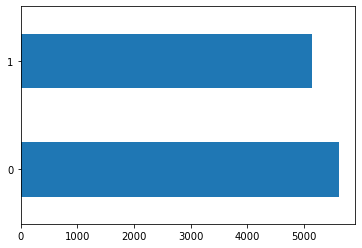

In [854]:
# visualizing gender classification
cota_df['gender'].value_counts().plot(kind = 'barh');

In [855]:
#check a particular column to see various race
cota_df.loc[:,"race"] 

0                            WHITE
1        BLACK OR AFRICAN AMERICAN
2                            WHITE
3        BLACK OR AFRICAN AMERICAN
4                            ASIAN
                   ...            
10756                        WHITE
10757                        WHITE
10758                        WHITE
10759                        WHITE
10760                        WHITE
Name: race, Length: 10761, dtype: object

In [856]:
# classifying race
cota_df['race'] = cota_df['race'].map({'WHITE': 0, 'BLACK OR AFRICAN AMERICAN': 1, 'ASIAN': 2}) 

In [857]:
cota_df['race'].value_counts()

0.0    7862
1.0     902
2.0     670
Name: race, dtype: int64

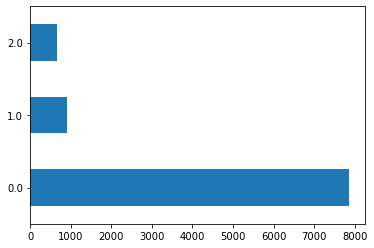

In [858]:
# visualizing race classification
cota_df['race'].value_counts().plot(kind = 'barh');

In [859]:
# check a particular column to see various ethnicities
cota_df.loc[:,"ethnicity"] 

0            HISPANIC OR LATINO
1        NOT HISPANIC OR LATINO
2            HISPANIC OR LATINO
3            HISPANIC OR LATINO
4        NOT HISPANIC OR LATINO
                  ...          
10756    NOT HISPANIC OR LATINO
10757    NOT HISPANIC OR LATINO
10758    NOT HISPANIC OR LATINO
10759    NOT HISPANIC OR LATINO
10760    NOT HISPANIC OR LATINO
Name: ethnicity, Length: 10761, dtype: object

In [860]:
# classifying ethnicity
cota_df['ethnicity'] = cota_df['ethnicity'].map({'HISPANIC OR LATINO': 1, 'NOT HISPANIC OR LATINO': 0}) 

In [861]:
cota_df['ethnicity'].value_counts()

0.0    7850
1.0     366
Name: ethnicity, dtype: int64

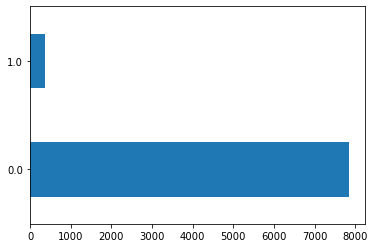

In [862]:
# visualizing ethnicity classification
cota_df['ethnicity'].value_counts().plot(kind = 'barh');

### Gender and Ethnicity Visual

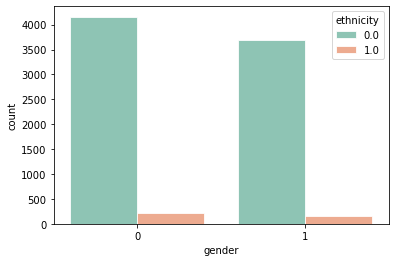

In [863]:
ax = sns.countplot(x='gender', hue="ethnicity", data=cota_df, edgecolor='white', palette="Set2", alpha=0.8)

In [864]:
 # classifying vital_status
cota_df['vital_status'] = cota_df['vital_status'].map({'Alive': 1, 'Dead': 0})

In [865]:
cota_df['vital_status'].value_counts()

1.0    7326
0.0    3430
Name: vital_status, dtype: int64

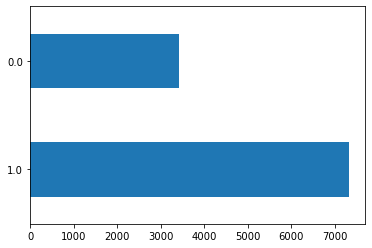

In [866]:
cota_df['vital_status'].value_counts().plot(kind = 'barh');

In [867]:
cota_df.head()

,bcr_patient_uuid,gender,race,ethnicity,vital_status,days_to_birth,days_to_death,icd_10,pathologic_M,clinical_M,pathologic_stage,clinical_stage,age_at_initial_pathologic_diagnosis
0,C2F1B2D5-1302-4E29-8889-37BA34E91DE2,0,0.0,1.0,1.0,-22529.0,[Not Applicable],C02.9,M0,M0,Stage III,Stage III,61.0
1,573E3713-781F-447E-9F4D-A7FAAE4A4F03,1,1.0,0.0,1.0,-20109.0,[Not Applicable],C02.9,M0,M1,Stage III,Stage IVC,55.0
2,59DD907E-C674-46C2-BCE7-63517D5AE7A7,0,0.0,1.0,1.0,-23375.0,[Not Applicable],C15.4,M0,0,Stage IIA,0,63.0
3,F4CB24E9-E7FD-4245-9C9B-7E0934038446,1,1.0,1.0,0.0,-19886.0,763.0,C15.5,M0,0,Stage IIB,0,54.0
4,9fa752b7-9873-4bad-9eba-8cc113705fed,1,2.0,0.0,1.0,-32872.0,[Not Applicable],C16.0,M0,[Not Applicable],[Discrepancy],[Not Applicable],90.0


## Analysis of Gender Alive or Dead

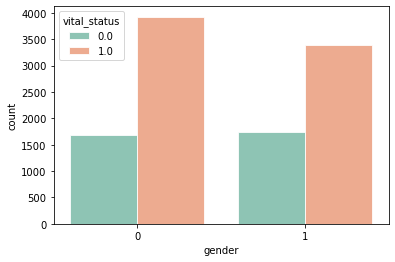

In [868]:
ax = sns.countplot(x='gender', hue="vital_status", data=cota_df, edgecolor='white', palette="Set2", alpha=0.8)

## Finding the Average Age and Birth Year

* To get the average age, first treat all rows with [Not application] using the pandas function called pd.t_numeric.

* The second step would be to change the result from first line of code(NaN) to zero since it was provided that [Not Applicable] patients survived and the mapping for patients that survived is zero.
* fill Nan with 0
* Use Absolute function in python to get the positive values of the column days_to birth 

* change both columns(days_to birth and days_to_death) to years by dividing by 365 days

* Determine birth year
* Use summary statistics to get the average age.

In [869]:
cota_df['days_to_death'] = pd.to_numeric(cota_df['days_to_death'], errors='coerce')

In [870]:
cota_df.head()

,bcr_patient_uuid,gender,race,ethnicity,vital_status,days_to_birth,days_to_death,icd_10,pathologic_M,clinical_M,pathologic_stage,clinical_stage,age_at_initial_pathologic_diagnosis
0,C2F1B2D5-1302-4E29-8889-37BA34E91DE2,0,0.0,1.0,1.0,-22529.0,NaN,C02.9,M0,M0,Stage III,Stage III,61.0
1,573E3713-781F-447E-9F4D-A7FAAE4A4F03,1,1.0,0.0,1.0,-20109.0,NaN,C02.9,M0,M1,Stage III,Stage IVC,55.0
2,59DD907E-C674-46C2-BCE7-63517D5AE7A7,0,0.0,1.0,1.0,-23375.0,NaN,C15.4,M0,0,Stage IIA,0,63.0
3,F4CB24E9-E7FD-4245-9C9B-7E0934038446,1,1.0,1.0,0.0,-19886.0,763.0,C15.5,M0,0,Stage IIB,0,54.0
4,9fa752b7-9873-4bad-9eba-8cc113705fed,1,2.0,0.0,1.0,-32872.0,NaN,C16.0,M0,[Not Applicable],[Discrepancy],[Not Applicable],90.0


In [871]:
cota_df['days_to_death'] = cota_df['days_to_death'].fillna(0)

In [872]:
cota_df.head()

,bcr_patient_uuid,gender,race,ethnicity,vital_status,days_to_birth,days_to_death,icd_10,pathologic_M,clinical_M,pathologic_stage,clinical_stage,age_at_initial_pathologic_diagnosis
0,C2F1B2D5-1302-4E29-8889-37BA34E91DE2,0,0.0,1.0,1.0,-22529.0,0.0,C02.9,M0,M0,Stage III,Stage III,61.0
1,573E3713-781F-447E-9F4D-A7FAAE4A4F03,1,1.0,0.0,1.0,-20109.0,0.0,C02.9,M0,M1,Stage III,Stage IVC,55.0
2,59DD907E-C674-46C2-BCE7-63517D5AE7A7,0,0.0,1.0,1.0,-23375.0,0.0,C15.4,M0,0,Stage IIA,0,63.0
3,F4CB24E9-E7FD-4245-9C9B-7E0934038446,1,1.0,1.0,0.0,-19886.0,763.0,C15.5,M0,0,Stage IIB,0,54.0
4,9fa752b7-9873-4bad-9eba-8cc113705fed,1,2.0,0.0,1.0,-32872.0,0.0,C16.0,M0,[Not Applicable],[Discrepancy],[Not Applicable],90.0


In [873]:
cota_df['days_to_birth'] = cota_df['days_to_birth'].abs()

In [874]:
cota_df.head()

,bcr_patient_uuid,gender,race,ethnicity,vital_status,days_to_birth,days_to_death,icd_10,pathologic_M,clinical_M,pathologic_stage,clinical_stage,age_at_initial_pathologic_diagnosis
0,C2F1B2D5-1302-4E29-8889-37BA34E91DE2,0,0.0,1.0,1.0,22529.0,0.0,C02.9,M0,M0,Stage III,Stage III,61.0
1,573E3713-781F-447E-9F4D-A7FAAE4A4F03,1,1.0,0.0,1.0,20109.0,0.0,C02.9,M0,M1,Stage III,Stage IVC,55.0
2,59DD907E-C674-46C2-BCE7-63517D5AE7A7,0,0.0,1.0,1.0,23375.0,0.0,C15.4,M0,0,Stage IIA,0,63.0
3,F4CB24E9-E7FD-4245-9C9B-7E0934038446,1,1.0,1.0,0.0,19886.0,763.0,C15.5,M0,0,Stage IIB,0,54.0
4,9fa752b7-9873-4bad-9eba-8cc113705fed,1,2.0,0.0,1.0,32872.0,0.0,C16.0,M0,[Not Applicable],[Discrepancy],[Not Applicable],90.0


In [875]:
cota_df['age'] = (cota_df['days_to_birth'])/365 - (cota_df['days_to_death'])/365

In [876]:
cota_df.head()

,bcr_patient_uuid,gender,race,ethnicity,vital_status,days_to_birth,days_to_death,icd_10,pathologic_M,clinical_M,pathologic_stage,clinical_stage,age_at_initial_pathologic_diagnosis,age
0,C2F1B2D5-1302-4E29-8889-37BA34E91DE2,0,0.0,1.0,1.0,22529.0,0.0,C02.9,M0,M0,Stage III,Stage III,61.0,61.723288
1,573E3713-781F-447E-9F4D-A7FAAE4A4F03,1,1.0,0.0,1.0,20109.0,0.0,C02.9,M0,M1,Stage III,Stage IVC,55.0,55.093151
2,59DD907E-C674-46C2-BCE7-63517D5AE7A7,0,0.0,1.0,1.0,23375.0,0.0,C15.4,M0,0,Stage IIA,0,63.0,64.041096
3,F4CB24E9-E7FD-4245-9C9B-7E0934038446,1,1.0,1.0,0.0,19886.0,763.0,C15.5,M0,0,Stage IIB,0,54.0,52.391781
4,9fa752b7-9873-4bad-9eba-8cc113705fed,1,2.0,0.0,1.0,32872.0,0.0,C16.0,M0,[Not Applicable],[Discrepancy],[Not Applicable],90.0,90.060274


In [877]:
cota_df.describe()

,gender,race,ethnicity,vital_status,days_to_birth,days_to_death,age_at_initial_pathologic_diagnosis,age
count,10761.000000,9434.000000,8216.000000,10756.000000,10761.000000,10761.000000,10761.000000,10761.000000
mean,0.477465,0.237651,0.044547,0.681108,21535.248490,276.203234,58.852616,58.243960
std,0.499515,0.568548,0.206320,0.466069,5687.971481,676.507724,14.876875,15.647916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.936986
25%,0.000000,0.000000,0.000000,0.000000,18363.000000,0.000000,50.000000,49.446575
50%,0.000000,0.000000,0.000000,1.000000,22159.000000,0.000000,60.000000,60.043836
75%,1.000000,0.000000,0.000000,1.000000,25560.000000,243.000000,70.000000,69.301370
max,1.000000,2.000000,1.000000,1.000000,32918.000000,10870.000000,90.000000,90.063014


# Average Age

#### The average age from the summary statistics is 58.243960

# Distribution of age across each race

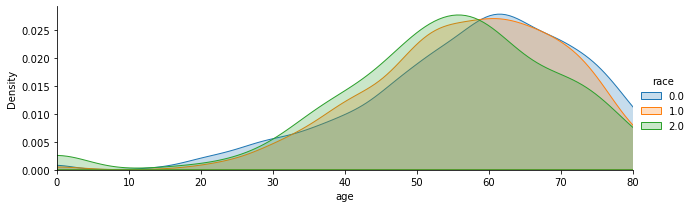

In [878]:
#Distribution of age across each race
age_class = sns.FacetGrid(cota_df, hue='race', aspect=3, legend_out=True)
age_class.map(sns.kdeplot, "age", shade=True).add_legend()
age_class.set(xlim=(0, 80))

# Distribution of age across each Ethnicity

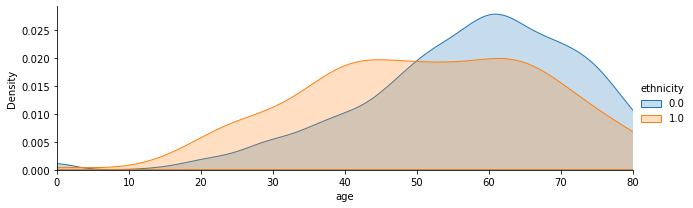

In [879]:
#Distribution of age across each race
age_class = sns.FacetGrid(cota_df, hue='ethnicity', aspect=3, legend_out=True)
age_class.map(sns.kdeplot, "age", shade=True).add_legend()
age_class.set(xlim=(0, 80))

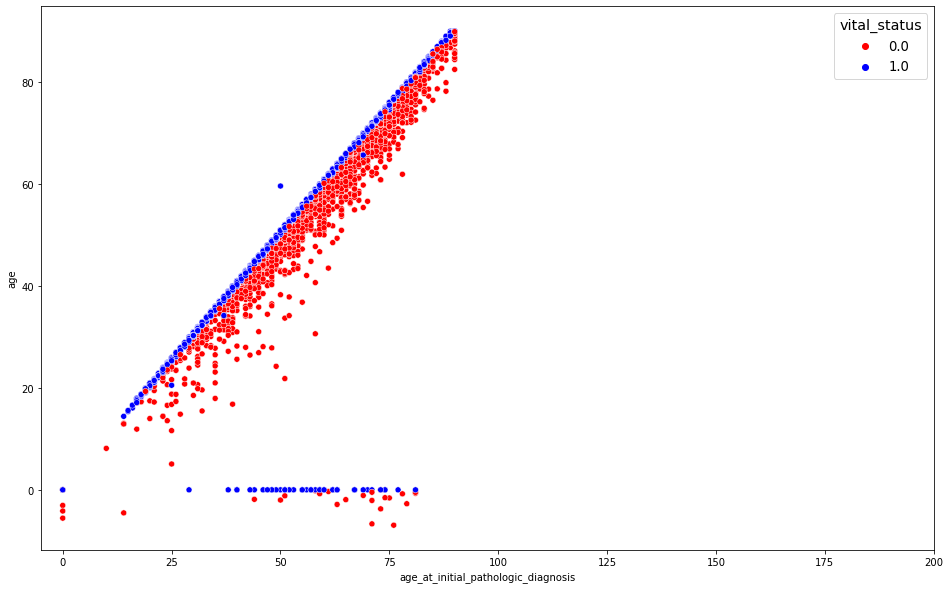

In [880]:
## Survival rate with age and age_at_initial_pathologic_diagnosis

fig, ax = plt.subplots(figsize=(16,10))
plt.xlim(-5,200)

with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.scatterplot(
        x='age_at_initial_pathologic_diagnosis',
        y='age',
        hue='vital_status',
        palette=['red','blue'],
        data=cota_df,
        ax=ax
    )

## Birth year Breakdown

In [881]:
import datetime
now = datetime.datetime.now()
current_year = now.year

In [882]:
print(current_year - cota_df['age'])

0        1960.276712
1        1966.906849
2        1957.958904
3        1969.608219
4        1931.939726
            ...     
10756    1966.339726
10757    1940.972603
10758    1978.575342
10759    1941.112329
10760    1966.315068
Name: age, Length: 10761, dtype: float64


## Identifying Metastatic Cancer patients and grouping them with Icd_10 codes

#### Assumptions

* To determine Metastatic cancer patients, I needed columns that are relevant based on definition.



* First determine all the stages relevant to this question. After proper scanning of the columns, 'pathologic_stage' and 'clinical_stage' are relevant.


* Also, I decided to scan through patients in columns 'clinical_M' and 'pathological_M'. This is relevant based on the definition also.


* I created 4 variables to identify the values within the various columns relevant to the question before sorting them using the icd_10 codes.

* To avoid dublicates, I used bcr_patient_uuid to filter the merged dataframe for the diffrent 4 dataframe created.

In [883]:
# get unique values for this column to help determine different stages that IV or above 
cota_df['pathologic_stage'].unique()

array(['Stage III', 'Stage IIA', 'Stage IIB', '[Discrepancy]',
       'Stage IIIB', 'Stage I', 'Stage IIIC', 'Stage IV', 'Stage IA',
       'Stage IIIA', 'Stage IB', 0, '[Not Applicable]', 'Stage II',
       'Stage IVA', 'Stage IVB', '[Unknown]', 'Stage IIC', 'Stage IVC',
       'I or II NOS', 'Stage 0', 'Stage IS', 'Stage X'], dtype=object)

In [884]:
# get unique values for this column to help determine different stages that IV or above 
cota_df['clinical_stage'].unique()

array(['Stage III', 'Stage IVC', 0, '[Not Applicable]', 'Stage IIIC',
       'Stage IV', 'Stage IIC', 'Stage IC', 'Stage IIA', 'Stage IIIA',
       'Stage IIIB', 'Stage IIB', 'Stage IA', 'Stage IB', 'Stage I',
       'Stage IVA', 'Stage II', 'Stage IVB', 'Stage IB1', 'Stage IB2',
       'Stage IIA1', 'Stage IIA2', 'Stage IA1', 'Stage IIIC2',
       'Stage IIIC1', 'Stage IS', 'Stage IA2'], dtype=object)

In [885]:
cota_df.loc[:,"pathologic_M"]

0        M0
1        M0
2        M0
3        M0
4        M0
         ..
10756     0
10757     0
10758     0
10759     0
10760     0
Name: pathologic_M, Length: 10761, dtype: object

In [886]:
# get unique values for this column to help determine different with at least an M1 in it 
cota_df['clinical_M'].unique()

array(['M0', 'M1', 0, '[Not Applicable]', 'M1b', 'MX', 'M1a', 'M1c'],
      dtype=object)

In [887]:
# get unique values for this column to help determine different with at least an M1 in it 
cota_df['pathologic_M'].unique()

array(['M0', 'MX', 'M1', 0, '[Not Applicable]', 'M1b', 'M1a', 'M1c',
       'cM0 (i+)', '[Unknown]'], dtype=object)

In [888]:
cota_df.loc[:,"icd_10"]

0        C02.9
1        C02.9
2        C15.4
3        C15.5
4        C16.0
         ...  
10756    C71.9
10757    C71.9
10758    C71.9
10759    C71.9
10760    C71.9
Name: icd_10, Length: 10761, dtype: object

In [889]:
# Create 2 different list 'stages' and 'M1_values' where each list will comprise of:
#(pathologic_stage and clinical_stage for stages 'IV' and above) and
# (pathological_M and clinical_M for values that has at least'M1' in it)
# finally group by Icd_10 codes

stages = ['Stage IV', 'Stage IVA', 'Stage IVB', 'Stage IVC']
M1_values = ['M1', 'M1a', 'M1b', 'M1c']

m = cota_df[cota_df['pathologic_stage'].isin(stages) == True]
n = cota_df[cota_df['clinical_stage'].isin(stages) == True]
o = cota_df[cota_df['clinical_M'].isin(M1_values) == True]
p = cota_df[cota_df['pathologic_M'].isin(M1_values) == True]

In [890]:
# grouping by icd_10 code
m.shape
m.sort_values(by=['icd_10'], inplace=True)

In [891]:
# grouping by icd_10 code
n.shape
n.sort_values(by=['icd_10'], inplace=True)

In [892]:
# grouping by icd_10 code
o.shape
o.sort_values(by=['icd_10'], inplace=True)

In [893]:
# grouping by icd_10 code
p.shape
p.sort_values(by=['icd_10'], inplace=True)

In [894]:
# Merge all 4 dataframe into one
merged_df = pd.concat([m, n,o, p])
merged_df.shape

(1709, 14)

In [895]:
# Check for dublicates using 'bcr_patient_uuid' to avoid patients appearing more than once in the counts.
merged_df_nodups = merged_df.drop_duplicates(subset=['bcr_patient_uuid'])
merged_df_nodups.shape

(1100, 14)

## Survival Analysis for Breast Cancer Patients

#### Assumptions

* To run the survival analysis using single Kaplan Meier curve, I first determine various ICD 10 codes for breast cancer through google search [Link text Here](https://www.ambrygen.com/material/oncology/icd-10-code-reference-sheets/breast-cancer-icd-10-codes/630)

* The list for icd_10 codes used in this test are; C50.5', 'C50.8', 'C50.919 and C50.522.


* Then,I scanned through the column 'icd_10' for those icd_10 codes listwed above for my analysis


* I mapped the icd_codes used as 1 and every other codes in the column icd_10 to zero

In [896]:
cota_df['icd_10'].unique()

array(['C02.9', 'C15.4', 'C15.5', 'C16.0', 'C18.0', 'C18.2', 'C18.7',
       'C19', 'C20', 'C34.1', 'C34.3', 'C34.12', 'C34.9', 'C48.0',
       'C48.1', 'C48.2', 'C49.5', 'C50.9', 'C56.9', 'C61', 'C63.1',
       'C64.9', 'C64.1', 'C67.9', 'C71.0', 'C71.2', 'C71.9', 'C74.9', 0,
       'C00.9', 'C01', 'C03.9', 'C04.0', 'C04.9', 'C05.9', 'C06.0',
       'C06.2', 'C06.9', 'C07', 'C08.0', 'C09.9', 'C10.3', 'C10.9',
       'C13.9', 'C14.8', 'C15.9', 'C15.3', 'C16.1', 'C16.2', 'C16.3',
       'C83.3', 'C16.9', 'C17.9', 'C18.3', 'C18.4', 'C18.5', 'C18.6',
       'C18.9', 'C43.51', 'C22.0', 'C22.1', 'C25.0', 'C25.1', 'C25.2',
       'C25.9', 'C44.31', 'C32.1', 'C32.9', 'C34.0', 'C34.2', 'C34.30',
       'C34.8', 'C37', 'C38.1', 'C45.0', 'C44.2', 'C44.3', 'C44.4',
       'C44.5', 'C44.50', 'C44.6', 'C44.601', 'C44.7', 'C44.701', 'C44.9',
       'C49.0', 'C49.10', 'C49.1', 'C49.2', 'C49.20', 'C49.3', 'C49.4',
       'C49.6', 'C49.9', 'C50.2', 'C51.9', 'C52', 'C53.0', 'C53.1',
       'C53.9', 'C54

In [917]:
# Mapping codes into categories
cota_df['icd_10'] = cota_df['icd_10'].map({'C50.5': 1, 'C50.8': 1, 'C50.919': 1, 'C50.522': 1}) 

In [918]:
cota_df['icd_10'].unique()

array([nan,  1.])

In [919]:
cota_df['icd_10'].fillna(value=0, inplace=True) # replacing NaN with 0

In [920]:
cota_df['icd_10'].unique()

array([0., 1.])

In [921]:
cota_df['icd_10'].value_counts()

0.0    10752
1.0        4
Name: icd_10, dtype: int64

In [897]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [898]:
import lifelines
import statistics
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from scipy import stats

In [899]:
cota_df.head()

,bcr_patient_uuid,gender,race,ethnicity,vital_status,days_to_birth,days_to_death,icd_10,pathologic_M,clinical_M,pathologic_stage,clinical_stage,age_at_initial_pathologic_diagnosis,age
0,C2F1B2D5-1302-4E29-8889-37BA34E91DE2,0,0.0,1.0,1.0,22529.0,0.0,C02.9,M0,M0,Stage III,Stage III,61.0,61.723288
1,573E3713-781F-447E-9F4D-A7FAAE4A4F03,1,1.0,0.0,1.0,20109.0,0.0,C02.9,M0,M1,Stage III,Stage IVC,55.0,55.093151
2,59DD907E-C674-46C2-BCE7-63517D5AE7A7,0,0.0,1.0,1.0,23375.0,0.0,C15.4,M0,0,Stage IIA,0,63.0,64.041096
3,F4CB24E9-E7FD-4245-9C9B-7E0934038446,1,1.0,1.0,0.0,19886.0,763.0,C15.5,M0,0,Stage IIB,0,54.0,52.391781
4,9fa752b7-9873-4bad-9eba-8cc113705fed,1,2.0,0.0,1.0,32872.0,0.0,C16.0,M0,[Not Applicable],[Discrepancy],[Not Applicable],90.0,90.060274


In [907]:
cota_df.isnull().sum()

bcr_patient_uuid                          0
gender                                    0
race                                   1325
ethnicity                              2541
vital_status                              0
days_to_birth                             0
days_to_death                             0
icd_10                                    0
pathologic_M                              0
clinical_M                                0
pathologic_stage                          0
clinical_stage                            0
age_at_initial_pathologic_diagnosis       0
age                                       0
dtype: int64

In [926]:
cota_df['days_to_death'].unique()

array([   0.,  763., 2134., ..., 3136.,  287.,  621.])

In [908]:
cota_df['vital_status'].unique()

array([1., 0.])

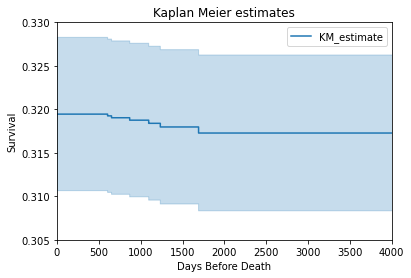

In [934]:
kmf = KaplanMeierFitter()
X= cota_df['days_to_death']
Y = cota_df['vital_status']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("Days Before Death")
plt.ylabel("Survival")
plt.xlim([0,4000])
plt.ylim([0.305,0.33])
plt.show()

# General Python Questions

In [ ]:
### Exercise 1
def largest_digit (integer):
  #Convert the integer into an array of integers for analysis
  intArray = [int(x) for x in str(integer)]
 
  #Step 0 special case - only 1 digit
  if len(intArray) == 1:
    print(True)
    return True

  #Step 1 identify the largest digit in the sequence
  largest = 0
 
  for x in intArray:
    if x > largest:
      largest = x

  #Step 2 true/false statement for frequency
  if intArray.count(largest) == 1:
    print(True)
    return True
  else:
    print(False)
    return False

In [ ]:
largest_digit(155222)

In [ ]:
largest_digit(77777891)

In [ ]:
largest_digit(1)

In [ ]:
### Exercise 2
def removeSimilar(drugs):
  #assuming the input is a list of strings
  #create an array to store the new filtered list
  arr = []

  #iterate through the list of drugs with a for loop
  for drug in drugs:
  # assuming the given cases for drugs are the only possibilities - no lower
  # case characters, non numerical characters
   
  #three cases:
  # case 1: stay the same => no hyphen, after hyphen not length 4
  # case 2: with hyphen and length 4 or with hyphen and "hyaluronidase"
  # case 3: anti prefix => two hyphens + length 4 after 2nd hyphen

    #letter name only => length 1
    if len(drug) == 1:
      arr.append(drug)
      continue

    #all other cases have a hyphen to process so extract it first
    drug_end = drug[drug.index('-')+1:]
   
    #special hyphen case 1: drug has an anti prefix
    if drug[0] == 'a':
      #check if the drug has a four letter suffix
      if len(drug_end) == 6:
        #add the anti prefix and the drug letter to the new list
        arr.append(drug[:drug.index('-')+2])
      else:
        arr.append(drug)
    #special hyphen case 2: drug has hyaluronidase or has a suffix length 4
    elif drug_end == 'hyaluronidase' or len(drug_end) == 4:
      arr.append(drug[:drug.index('-')])
    #all other drug names are added without making changes
    else:
      arr.append(drug)

  #return the new list at the end of the iteration
  return arr

###Test cases from worksheet
print(removeSimilar(['A', 'B', 'C-xxxx']))
print(removeSimilar(["D-xxxxx"]))
print(removeSimilar(['B','C-hyaluronidase']))
print(removeSimilar(['anti-E-xxxx']))

# General SQL Questions

#### Question One: Unique Patient ID that received CAR-T Therapy (CAR-T Therapy is a type of cellular therapy)


* The assumption here is to get all the patient IDs that are receiving CAR-T 


SELECT Patient ID



FROM Cellular_Therapy




WHERE Therapy_Type = CAR-T

#### Question Two: Total number of patients for every type of cellular therapy

* The assumption here is to first get sum or total of every patient ID  receiving cellular therapy then group the SUM according the type of therapy they received.




SELECT SUM(Patient ID)




FROM Cellular_Therapy




GROUP BY Therapy_Type

##### Question Three: Every ID that has received DRUG_X before receiving THERAPY_TYPE_T. (question is to be more abstract)

* In this question, there is a need to join tables using "INNER JOIN" functions in SQL.This is because the information needed for this question is given in the two tables.We want to find every ID that has received DRUG_X(this shoud be under "Drugs" in the Regimen table) before receiving THERAPY_TYPE_T(which should be under Therapy_Type).

SELECT c.Patient ID AS patient_ID, r.Patient ID AS Regimen


FROM Cellular_Therapy AS c


INNER JOIN Regimen AS r ON r.Patient ID = c.Patient ID



GROUP BY r.Drugs AND c.Therapy_Type